1\. Write a function that converts number representation (bin<->dec<->hex)

In [1]:
def con(num): 
    print("Decimal representation: \n", num)
    print("Binary representation: \n", bin(num))
    print("Hexadecimal representation: \n", hex(num))
con(3)

Decimal representation: 
 3
Binary representation: 
 0b11
Hexadecimal representation: 
 0x3


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [2]:
import struct
#01000001101011000111101011100001
def con():
    f = str(input())
    f = int(f, 2)
    print(struct.unpack('f', struct.pack('I', f))[0])
con()

01000001101011000111101011100001
21.559999465942383


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [3]:
import sys
under = 1.0
N = 1
i = 0 
while i < N:
    under = under/2
    if under == sys.float_info.min: 
        print(N)
        break
    elif under != sys.float_info.min:
        N += 1
        i += 1

1022


In [4]:
over = 1.
first_over = True
N = 1500
for i in range(N+1):
    over = over*2
    if over > sys.float_info.max:
        if first_over:
            print(i)
            first_over = False

1023


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [5]:
def prec(m):
    eps = 1.0
    k = m + eps
    L = 1
    i = 0
    while i < L:
        k = m + eps
        if k.hex() != m.hex(): 
            eps = eps/2
            L += 1
            i += 1
        elif k.hex() == m.hex(): 
            print(eps)
            print(i)
            break
prec(1.0) 

1.1102230246251565e-16
53


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [6]:
from math import sqrt

#a
def eq2(a, b, c):
    x_1 = (-b+sqrt(b**2-4*a*c))/(2*a)
    x_2 = (-b-sqrt(b**2-4*a*c))/(2*a)
    print(x_1, x_2)
d = 0.001
e = 1000
f = 0.001
eq2(d,e,f)

#b
def eq21(a, b, c):
    x_1 = (2*c)/(-b+sqrt(b**2-4*a*c))
    x_2 = (2*c)/(-b-sqrt(b**2-4*a*c))
    print(x_1, x_2)
eq21(d,e,f)

"""the solution which is inaccurate is the one with '+ discriminant'; this depends on the subtraction that occurs in the
quadratic equation. A way to solve this issue is to use the sign function, as to avoid cancellation problems between 
b and the square root of the discriminant, by ensuring that only numbers of the same sign are added. This results in the 
following algorithm, which in our case, with sgn(b)=+1 returns:"""

#c
def eq22(a, b, c):
    x_1 = (-b-sqrt(b**2-4*a*c))/(2*a)
    x_2 = (2*c)/(-b-sqrt(b**2-4*a*c))
    print(x_1, x_2)
eq22(d,e,f)



-9.999894245993346e-07 -999999.999999
-1000010.5755125057 -1.000000000001e-06
-999999.999999 -1.000000000001e-06


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

[1.010000000000001, 1.0009999999998895, 1.0000999999998899, 1.0000100000065513, 1.0000009999177333, 1.0000001005838672, 1.0000000039225287, 1.000000083740371, 1.000000082840371, 1.000000082750371, 1.0000889005833413, 0.9992007221627407, 0.9992007221626509, 1.1102230246251577, 0.0]


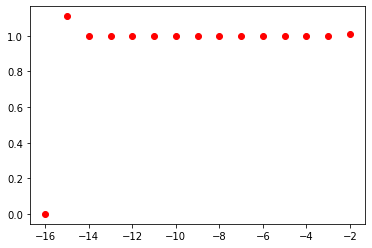

In [7]:
import matplotlib.pyplot as plt

de = [10**(-i) for i in range(2,17)]
exp = [-i for i in range(2,17)]
def der(x, d):
    def fu(x): 
        return x*(x-1)
    for i in range(len(d)):
        de[i] = (fu(x + d[i])-fu(x))/d[i]
    print(de)

der(1, de)
plt.plot(exp, de, "ro")
plt.show()

#The two values don't agree perfectly because we are summing two numbers which the program reads as the same number. 
#In order for the program to exactly read the increment and distinguish the two numbers we should write them in
#hexadecimal representation.

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [12]:
from math import sqrt
import time
#a
def intgr(n):
    h = 2/n
    i = 1
    def f(x): 
        return sqrt(1 - x**2)
    inss = 0.5 * h * (f(-1) + f(1))
    while i < n:
        inss += h*f(-1+i*h)
        i += 1
    return inss
print(intgr(100))

#the result is inferior to the true value

#b
time_start = time.time()
intgr(100)
time_stop = time.time()
print("{:e} s".format(time_stop-time_start))

# around a second in computing time if N is around 3.5/4 millions
time_start = time.time()
intgr(3800000)
time_stop = time.time()
print("{:e} s".format(time_stop-time_start))

time_start = time.time()
intgr(500000000)
time_stop = time.time()
print("{:e} s".format(time_stop-time_start))
print(intgr(500000000))
# by running it for 3 minutes you obtain a result which is the same as the pi declared in the text of the exercise.

1.5691342555492505
1.149178e-04 s
2.722065e+00 s
2.347141e+02 s
1.5707963267958165
